# Problem 2: Angled raptors

Mr. Munroe (the xkcd author) decided that running in a single direction was unrealistic. Your new problem is to solve the generalized raptor problem where you can turn twice. Once at 0.25 seconds. A second time at 0.75 seconds. Otherwise the problem is the same.
+ Ignore all acceleration, like we did in class.
+ The slow raptor runs at 10 m/s
+ The fast raptors run at 15 m/s
+ You run at 6 m/s
+ A raptor will catch you if you are within 20 centimeters.
+ You can turn instantaneously.

## 1. Modification of the Raptor Problem
Modify the the Raptor chase example function to compute the survival time of a human in a raptor problem where you switch direction at 0.25 seconds and 0.75 seconds. Show your modified function, and show the survival time when running directly at the slow raptor (up to time 0.25) and then reversing your direction and running away from it.

In [1]:
using Printf, LinearAlgebra

In [2]:
vhuman=6.0
vraptor0=10.0 # the slow raptor velocity in m/s
vraptor=15.0 # 

raptor_distance = 20.0

raptor_min_distance = 0.2 # a raptor within 20 cm can attack
tmax=10.0 # the maximum time in seconds 
nsteps=1000

"""
This function will compute the derivatives of the
positions of the human and the raptors
"""
function compute_derivatives(angle,h,r0,r1,r2)
    dh = [cos(angle),sin(angle)]*vhuman
    dr0 = (h-r0)/norm(h-r0)*vraptor0
    dr1 = (h-r1)/norm(h-r1)*vraptor
    dr2 = (h-r2)/norm(h-r2)*vraptor
    return dh, dr0, dr1, dr2
end

"""
This function will use forward Euler to simulate the Raptors
"""
function simulate_raptors(switch, angles; output::Bool = true)
    # initial positions 
    h = [0.0,0.0]
    r0 = [1.0,0.0]*raptor_distance
    r1 = [-0.5,sqrt(3.)/2.]*raptor_distance
    r2 = [-0.5,-sqrt(3.)/2.]*raptor_distance
    
    # how much time el
    dt = tmax/nsteps
    t = 0.0
    
    hhist = zeros(2,nsteps+1)
    r0hist = zeros(2,nsteps+1)
    r1hist = zeros(2,nsteps+2)
    r2hist = zeros(2,nsteps+2)
    
    hhist[:,1] = h
    r0hist[:,1] = r0
    r1hist[:,1] = r1
    r2hist[:,1] = r2
    
    st_angle = 0
    angle = 0
    
    for i=1:nsteps
        if i in switch
            st_angle = st_angle + 1
            angle = angles[st_angle]
        end
        
        dh, dr0, dr1, dr2 = compute_derivatives(angle,h,r0,r1,r2)
        h += dh*dt
        r0 += dr0*dt
        r1 += dr1*dt
        r2 += dr2*dt
        t += dt

        hhist[:,i+1] = h
        r0hist[:,i+1] = r0
        r1hist[:,i+1] = r1
        r2hist[:,i+1] = r2
        
        if norm(r0-h) <= raptor_min_distance ||
            norm(r1-h) <= raptor_min_distance ||
            norm(r2-h) <= raptor_min_distance
            if output
                @printf("The raptors caught the human in %f seconds\n", t)
            end
            
            # truncate the history
            hhist = hhist[:,1:i+1]
            r0hist = r0hist[:,1:i+1]
            r1hist = r1hist[:,1:i+1]
            r2hist = r2hist[:,1:i+1]
            
            break
        end
    end
    if output == true
        return hhist, r0hist, r1hist, r2hist
    end
    return t
end

angles = [0, pi, pi]
switch = [1, 25, 75]
simulate_raptors(switch, angles)

The raptors caught the human in 1.290000 seconds


([0.0 0.06 … -4.799999999999997 -4.859999999999997; 0.0 0.0 … 7.641796026679495e-16 7.715274834628336e-16], [20.0 19.9 … 7.199999999999976 7.0999999999999766; 0.0 0.0 … 2.334626604429615e-16 2.3788530162816973e-16], [-10.0 -9.925 … -4.608401532048858 -4.747261864896243; 17.32050807568877 17.190604265121106 … 0.07826973998736977 0.021544014240460478], [-10.0 -9.925 … -4.608401532048857 -4.747261864896242; -17.32050807568877 -17.190604265121106 … -0.07826973998736922 -0.021544014240459555])

In [3]:
using Plots

In [4]:
import Pkg;
Pkg.add("Plots")

    Updating registry at `~/.julia/registries/General`
    Updating git-repo `https://github.com/JuliaRegistries/General.git`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


The raptors caught the human in 1.290000 seconds


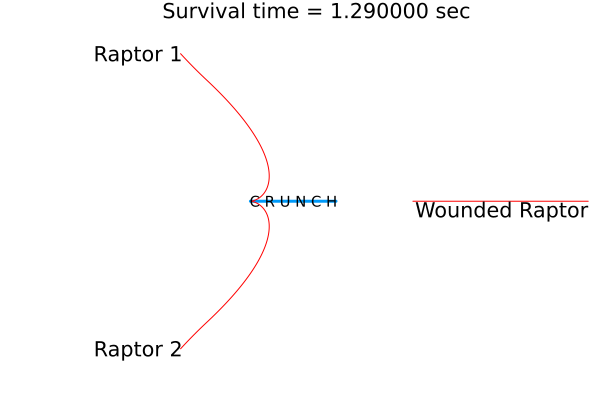

In [12]:
function show_raptors(switch, angles; args...)
    hhist, r0hist, r1hist, r2hist = simulate_raptors(switch, angles; args...)
    plot(vec(hhist[1,:]),vec(hhist[2,:]),linewidth=3)
    plot!(vec(r0hist[1,:]),vec(r0hist[2,:]),color=:red)
    plot!(vec(r1hist[1,:]),vec(r1hist[2,:]),color=:red)    
    plot!(vec(r2hist[1,:]),vec(r2hist[2,:]),color=:red)    
    #plot!(grid=false,xticks=false,yticks=false,legend=false,border=false)
    plot!(legend=false, framestyle=:none)
    plot!(xlim=[-20.,20.],ylim=[-20.,20.])
    annotate!(r0hist[1,1], r0hist[2,1]-1,text("Wounded Raptor",:right))
    annotate!(r1hist[1,1], r1hist[2,1],text("Raptor 1",:right))
    annotate!(r2hist[1,1], r2hist[2,1],text("Raptor 2",:right))    
    annotate!(hhist[1,end], hhist[2,end],text("C R U N C H",10,:left,"black"))    
    title!(@sprintf("Survival time = %f sec",(-1+length(hhist[2,:]))*tmax/nsteps))
end
angles = [0, pi]
switch = [1, 25]
show_raptors(switch, angles)

## 2.Grid Search
Utilize a grid-search strategy to determine the best angles for the human to run to maximize the survival time. Show the angles.

In [ ]:
switch = [1, 25, 75]
time_min  = 0
angle_min = [0,0,0]
for a1 = -pi:0.01:pi
    for a2 = -pi:0.01:pi
        for a3 = -pi:0.01:pi
            angles = [a1, a2, a3]
            time = simulate_raptors(switch, angles, output=false)
            if time > time_min
                time_min = time
                angle_min = angles
            end
        end
    end
end

time_min, angle_min
#@printf("The angles of %f would maximize the survival time of the human to %f seconds\n", t)


: 

## Add more angles
Discuss the major challenge for solving this problem with the current strategy if we added a fourth angle at 0.5 seconds. (Or do so!) And a fifth angle at 0.75 seconds. (Or if you are feeling ambitious, solve these and see where you start running into trouble and discuss why that is!)

The major chanllenge for solving this problem with grid-search is that the time complexity increases exponentially w.r.t the number of turns. The dimension of the search space equals the number of turns $N$, thus resulting in the search space to be $O^N$. While the above code that incorporates 3 turns with a time complexity of $O(n^3)$ costs 8 minutes, the time complexity for 4 turns goes to $O(n^4)$ that consumes up to 20 minutes.

However, we can simulate raptors faster with the codes provided on Piazza.

In [ ]:
function evolve(dt,angle,h,r0,r1,r2)
    vhuman=6.0
    vraptor0=10.0 # the slow raptor velocity in m/s
    vraptor=15.0
    TT = Tuple{Float64,Float64}
    dh = (cos(angle),sin(angle)).*vhuman
    dr0 = (h.-r0)./norm(h.-r0).*vraptor0
    dr1 = (h.-r1)./norm(h.-r1).*vraptor
    dr2 = (h.-r2)./norm(h.-r2).*vraptor
    h = (h .+ dh.*dt)::TT
    r0 = (r0 .+ dr0.*dt)::TT
    r1 = (r1 .+ dr1.*dt)::TT
    r2 = (r2 .+ dr2.*dt)::TT
    return h, r0, r1, r2
end

"""
This function will use forward Euler to simulate the Raptors
"""
function simulate_raptors_faster(switch, angles; output::Bool = false)
    raptor_distance = 20.0
    raptor_min_distance = 0.2 # a raptor within 20 cm can attack
    tmax=10.0 # the maximum time in seconds
    nsteps=1000
    flag = 1 # indicate the position in "change"
    TT = Tuple{Float64,Float64}
    # initial positions
    h = (0.0,0.0)::TT
    r0 = ((1.0,0.0).*raptor_distance)::TT
    r1 = ((-0.5,sqrt(3.)/2.).*raptor_distance)::TT
    r2 = ((-0.5,-sqrt(3.)/2.).*raptor_distance)::TT
    # how much time el
    dt = tmax/nsteps
    t = 0.0

    st_angle = 0
    angle = 0

    for i=1:nsteps
        if i in switch
            st_angle = st_angle + 1
            angle = angles[st_angle]
        end
        
        h, r0, r1, r2 = evolve(dt, angle, h, r0, r1, r2)
        t += dt
        if norm(r0.-h) <= raptor_min_distance ||
            norm(r1.-h) <= raptor_min_distance ||
            norm(r2.-h) <= raptor_min_distance
            if output
                @printf("The raptors caught the human in %f seconds\n", t)
            end
            break
        end
    end
    return t
end

angles = [0, pi, pi/2]
switch = [1, 25, 75]
simulate_raptors_faster(switch, angles, output=true)

: 

: 

: 

: 

: 